In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np
import os
import ast
import Funciones as fn

Primero vamos a leer los datos y hacer un analisis exploratorio


In [2]:
ruta_datos = os.path.join("..", "Extraction", "Datos.csv")
ruta_mapa_categorico = os.path.join("..", "Extraction", "mapa_categorico.csv")
ruta_mapa_categorico_genero = os.path.join("..", "Extraction", "mapa_categorico_genero.csv")

datos = pd.read_csv(ruta_datos)
mapa_categorico = pd.read_csv(ruta_mapa_categorico)
mapa_categorico_genero = pd.read_csv(ruta_mapa_categorico_genero)
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   appid                1026 non-null   int64 
 1   required_age         1026 non-null   int64 
 2   is_free              1026 non-null   bool  
 3   price                1026 non-null   object
 4   developers           1026 non-null   object
 5   categories           1026 non-null   object
 6   release_date         1022 non-null   object
 7   genres               1026 non-null   object
 8   name                 1026 non-null   object
 9   Historico            1026 non-null   int64 
 10  review_score         1026 non-null   int64 
 11  review_score_desc    1026 non-null   object
 12  total_reviews        1026 non-null   int64 
 13  categories_numerico  1026 non-null   object
 14  genres_numerico      1026 non-null   object
dtypes: bool(1), int64(5), object(9)
memory usage: 113.3+ KB

In [ ]:
fila_index = datos.loc[datos['name'] == 'ARC Raiders'].index[0] #arreglo la fila de ARC Raiders pq esta mala
datos.at[fila_index, 'genres'] = "('Action')"
datos.loc[datos['name'] == 'ARC Raiders', 'genres_numerico'] = "(0,)"
datos.at[fila_index, 'price'] = 'CLP$ 31011'

In [4]:
datos.loc[datos['name'] == 'ARC Raiders']

,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico
1023,1808500,0,False,CLP$ 31011,Embark Studios,"('Multi-player', 'PvP', 'Online PvP', 'Co-op',...","Oct 30, 2025",('Action'),ARC Raiders,481966,8,Very Positive,69832,"(0, 20, 21, 18, 24, 1, 25, 26, 4, 13, 36)","(0,)"


In [5]:
datos.loc[~datos['is_free'], 'price'] = (
    datos.loc[~datos['is_free'], 'price']
    .str.replace('CLP$', '', regex=False)  # quita 'CLP$'
    .str.replace('.', '', regex=False)     # quita puntos de miles
    .str.strip()                           # quita espacios
)

In [6]:
datos.head()

,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico
0,730,0,True,0,Valve,"('Multi-player', 'Cross-Platform Multiplayer',...",2012-08-21 00:00:00,"('Action', 'Free To Play')",Counter-Strike 2,1862531,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)"
1,730,0,True,0,Valve,"('Multi-player', 'Cross-Platform Multiplayer',...",2012-08-21 00:00:00,"('Action', 'Free To Play')",Counter-Strike,319586,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)"
2,570,0,True,0,Valve,"('Multi-player', 'Co-op', 'Steam Trading Cards...",2013-07-09 00:00:00,"('Action', 'Strategy', 'Free To Play')",Dota 2,1295114,8,Very Positive,6095,"(0, 18, 2, 3, 19, 4, 6, 7, 8, 12, 17)","(0, 2, 1)"
3,578080,13,True,0,PUBG Corporation,"('Multi-player', 'PvP', 'Online PvP', 'Stats',...",2017-12-21 00:00:00,"('Action', 'Adventure', 'Massively Multiplayer...",PUBG: BATTLEGROUNDS,3257248,5,Mixed,278049,"(0, 20, 21, 13, 14, 15)","(0, 3, 4, 1)"
4,2507950,0,True,0,Team Jade,"('Single-player', 'Multi-player', 'MMO', 'PvP'...",2024-12-04 00:00:00,"('Action', 'Adventure', 'Massively Multiplayer...",Delta Force,247028,0,No user reviews,0,"(22, 0, 23, 20, 21, 18, 24, 1, 25, 26, 2, 4)","(0, 3, 4, 1)"


In [7]:
datos["categories_numerico"] = datos["categories_numerico"].apply(ast.literal_eval) #por alguna razon. ejecutar esta linea multiples veces genera un error
datos["genres_numerico"] = datos["genres_numerico"].apply(ast.literal_eval)
datos["categories"] = datos["categories"].apply(ast.literal_eval)
datos["genres"] = datos["genres"].apply(ast.literal_eval)
datos["price"] = datos["price"].astype(int)


Me interesa saber cuales son las categorias mas presente en este Dataframe, asi que vamos a graficar las categorias

In [8]:
numeros_aplanados = [n for tupla in datos["genres_numerico"] for n in tupla]
conteo = pd.Series(numeros_aplanados).value_counts().reset_index()
conteo.columns = ["numero", "frecuencia"]
conteo.head()

,numero,frecuencia
0,0,468
1,7,459
2,3,378
3,12,348
4,5,335


In [9]:
mapa_categorico_genero.head()

,clave,genero
0,Action,0
1,Free To Play,1
2,Strategy,2
3,Adventure,3
4,Massively Multiplayer,4


In [10]:
df_grafico = conteo.merge(mapa_categorico_genero, left_on='numero', right_on="genero", how="left")

In [11]:
df_grafico["clave"].unique() 

array(['Action', 'Indie', 'Adventure', 'Simulation', 'RPG', 'Strategy',
       'Casual', 'Free To Play', 'Massively Multiplayer', 'Early Access',
       'Sports', 'Racing', 'Utilities', 'Animation & Modeling',
       'Design & Illustration', 'Video Production', 'Game Development',
       'Education', 'Web Publishing', 'Violent', 'Photo Editing', 'Aksi',
       'Audio Production', 'Software Training', 'Gore'], dtype=object)

In [12]:
df_grafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numero      25 non-null     int64 
 1   frecuencia  25 non-null     int64 
 2   clave       25 non-null     object
 3   genero      25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 932.0+ bytes


In [13]:
df_grafico

,numero,frecuencia,clave,genero
0,0,468,Action,0
1,7,459,Indie,7
2,3,378,Adventure,3
3,12,348,Simulation,12
4,5,335,RPG,5
5,2,334,Strategy,2
6,6,265,Casual,6
7,1,221,Free To Play,1
8,4,99,Massively Multiplayer,4
9,15,99,Early Access,15


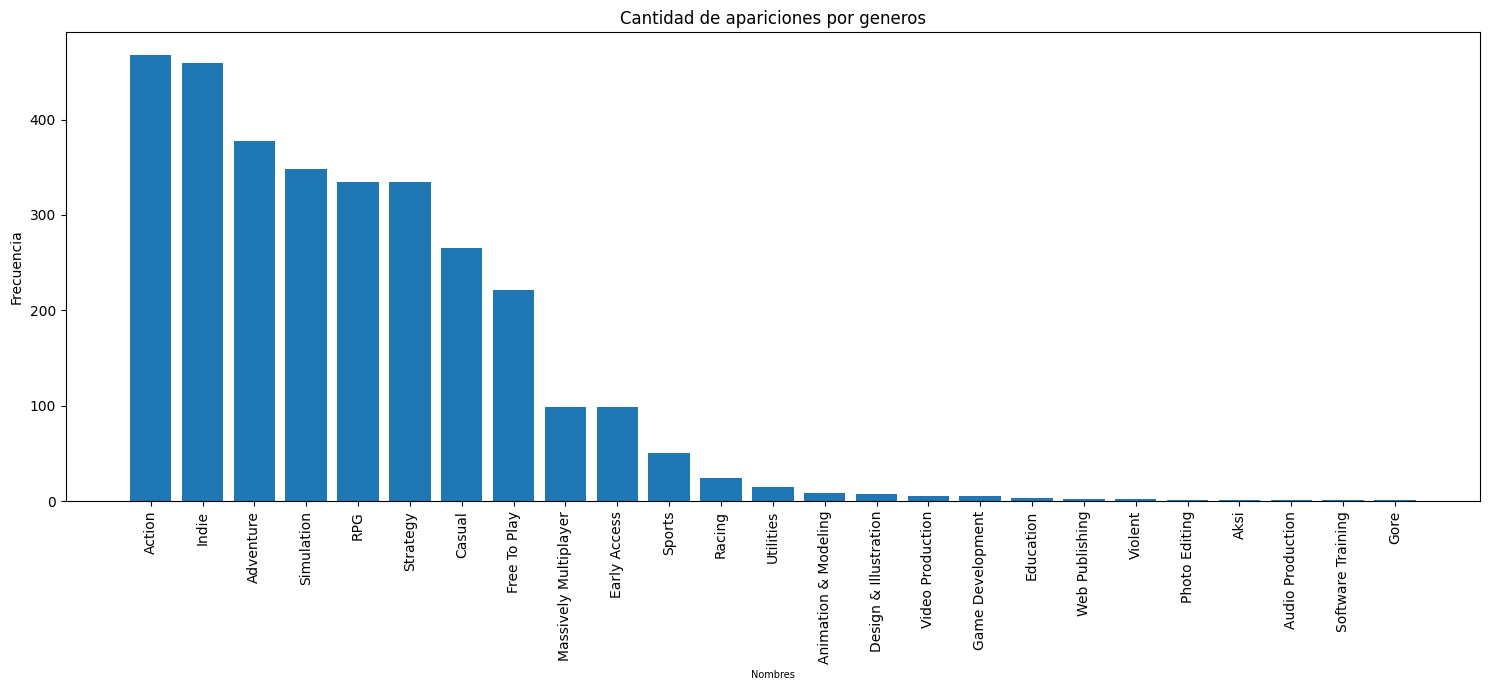

In [14]:
plt.figure(figsize=(15,7))
plt.bar(df_grafico["clave"], df_grafico["frecuencia"])
plt.xticks(rotation=90)
plt.xlabel("Nombres", fontsize=7) 
plt.ylabel("Frecuencia")
plt.title("Cantidad de apariciones por generos")
plt.tight_layout()
plt.show()

Vemos que los juegos principalmente son de accion, indie  de aventuras

Ahora me gustaria saber si la desarrolladora tiene algo que ver con la cantidad de jugadores peak de un juego (la columna historico es la cantidad maxima de jugadores unicos registrados en 24 horas)

In [15]:
# Contar juegos por developer
conteos = datos["developers"].value_counts()

#queremos los developers con mas de 2 juegos
dev_validos = conteos[conteos > 2].index


In [16]:
df_developers = datos[datos["developers"].isin(dev_validos)]
df_developers["dev_code"] = pd.factorize(df_developers["developers"])[0] #para usar corr necesitamos valores numericos
correlacion = df_developers[["dev_code", "Historico"]].corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22532\291945468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developers["dev_code"] = pd.factorize(df_developers["developers"])[0] #para usar corr necesitamos valores numericos


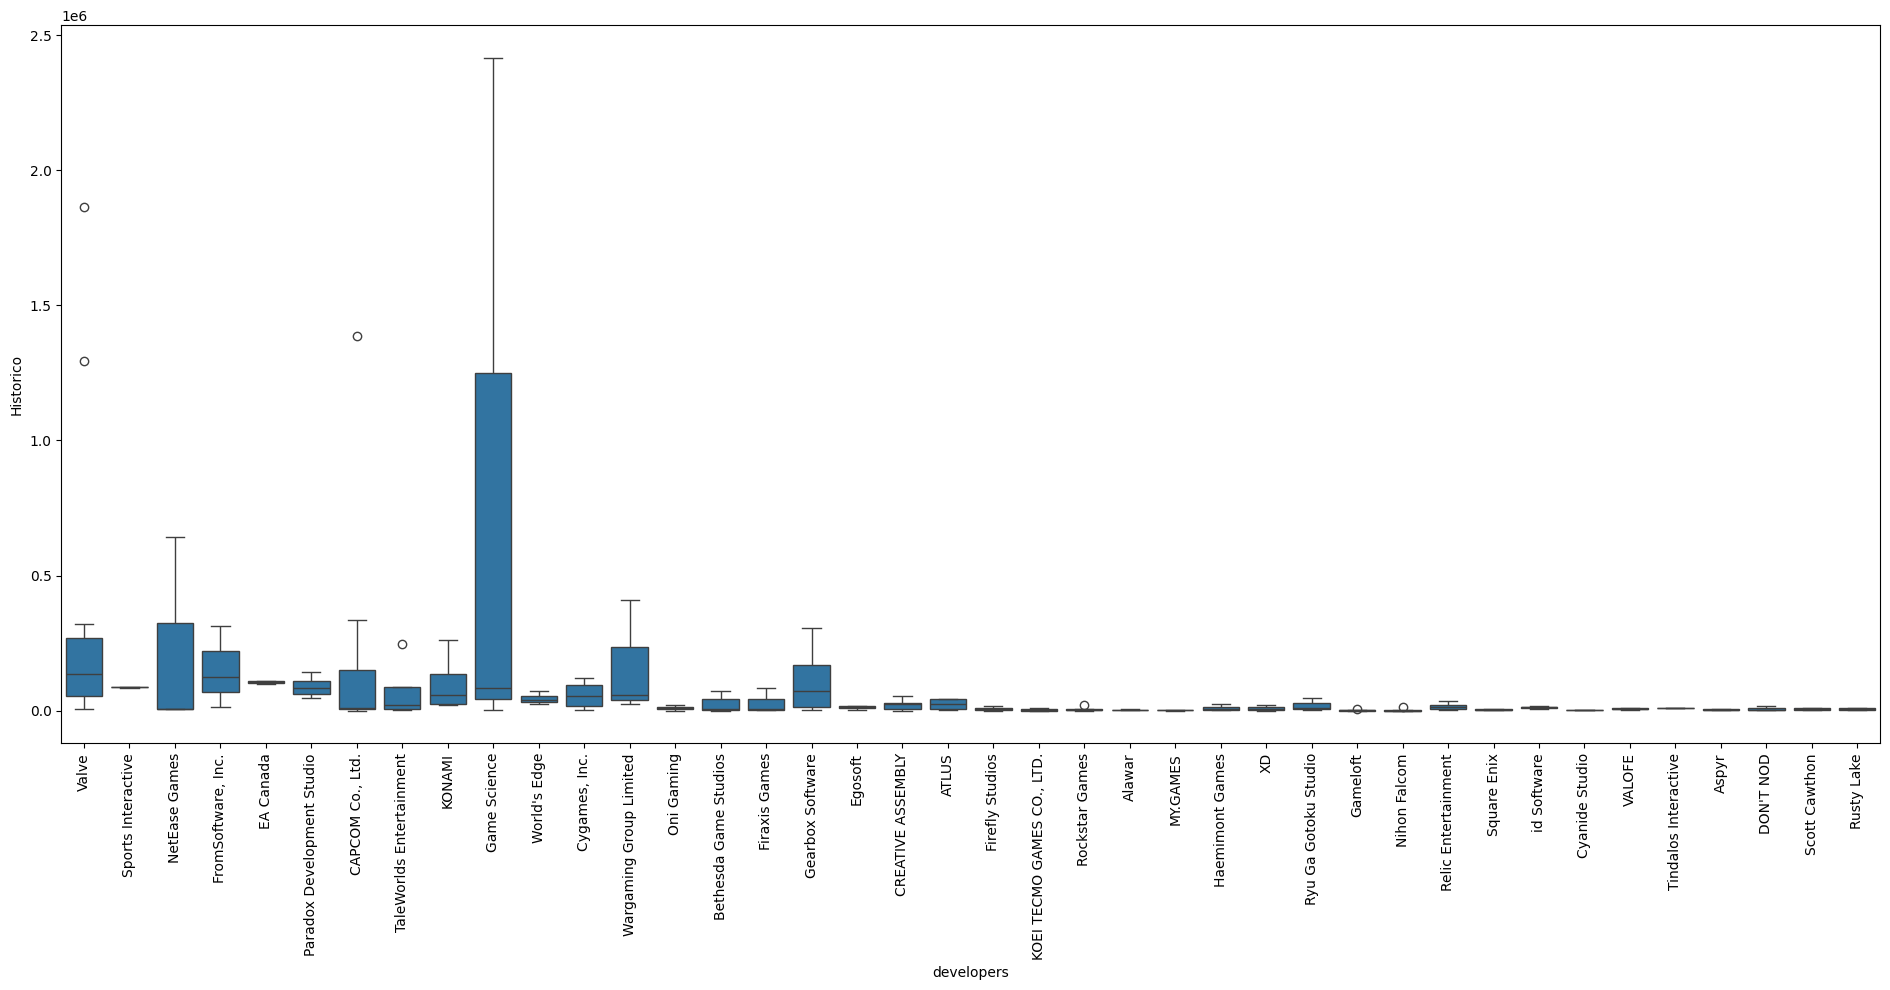

In [17]:
plt.figure(figsize=(19,10))
sns.boxplot(data=df_developers, x="developers", y="Historico")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vemos que hay un developer que sobre sale por demasiado de los demas, vamos a agregar un limite para que no rompa la escala

In [18]:
limite = df_developers["Historico"].quantile(0.95)
df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22532\2100842648.py:2: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22532\2100842648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)


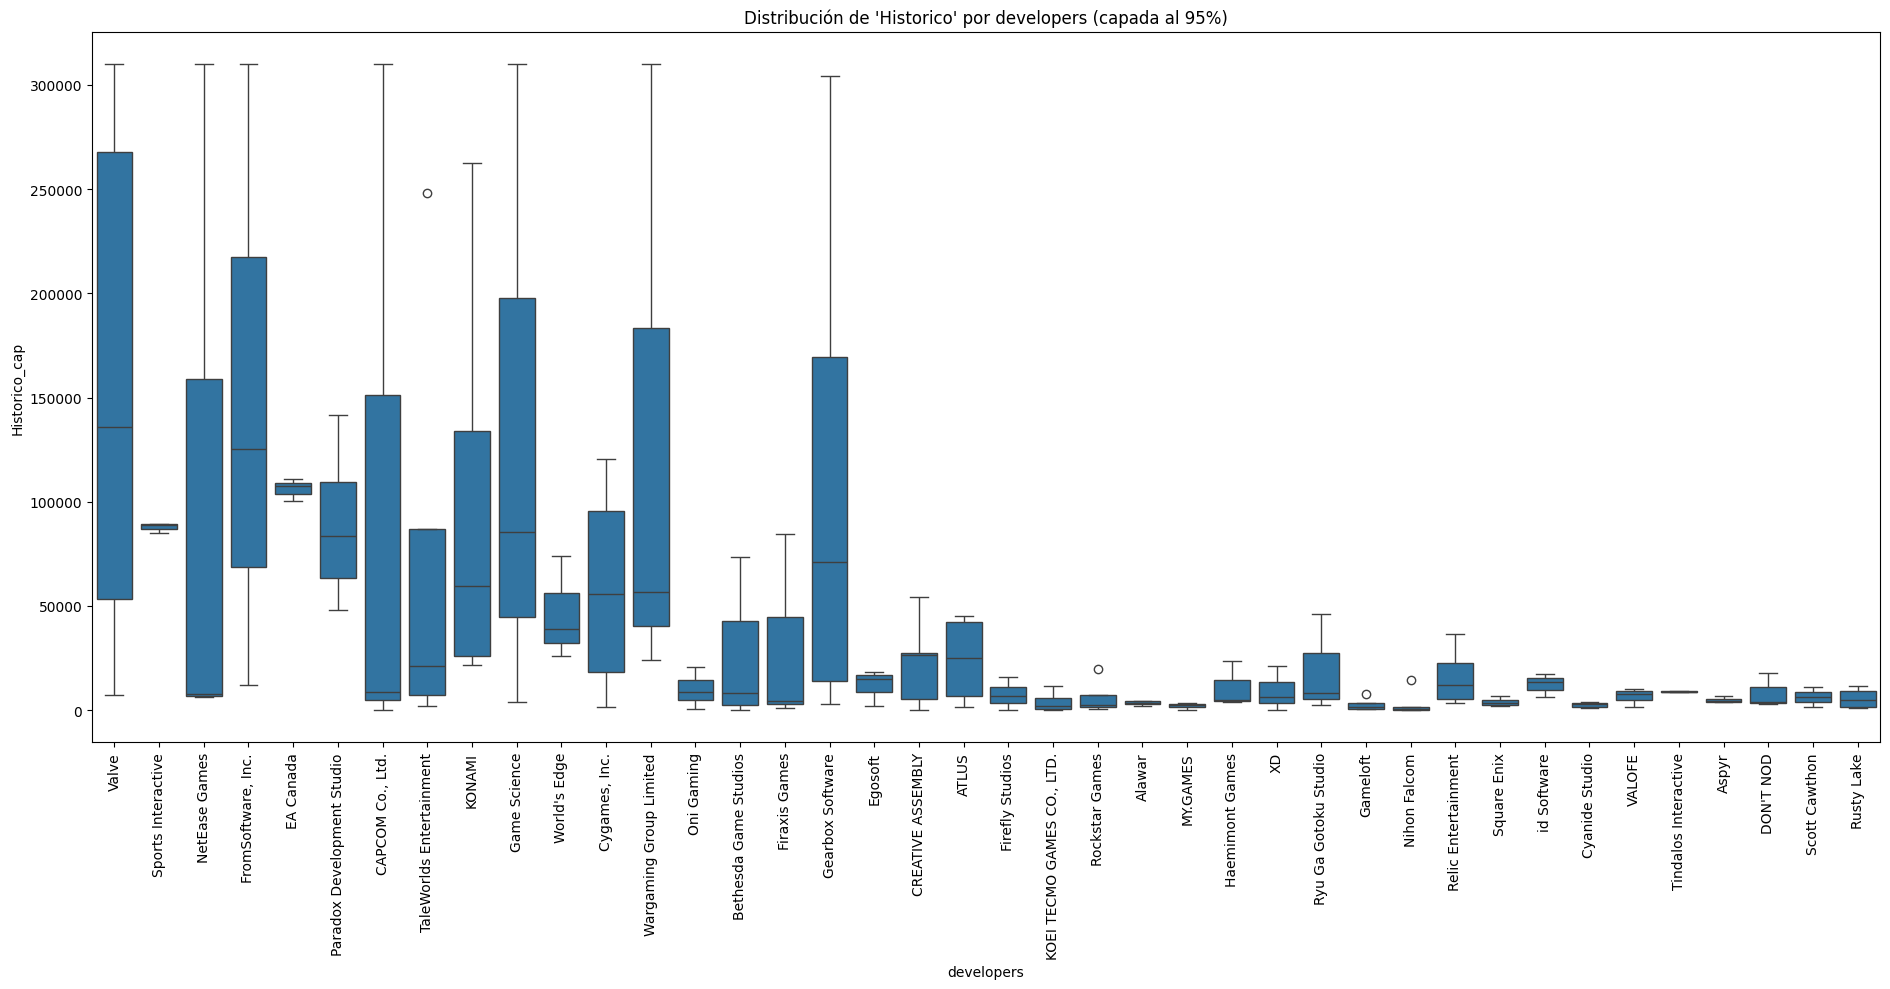

In [19]:
plt.figure(figsize=(19,10))
sns.boxplot(data=df_developers, x="developers", y="Historico_cap")
plt.xticks(rotation=90)
plt.title("Distribución de 'Historico' por developers (capada al 95%)")
plt.tight_layout()
plt.show()

Esto nos permite ver las compañias que han generado juegos que han tenido una cantidad de jugadores simultaneos muy alta, pero solo para aquellos juegos de compañias con mas de 2 juegos, que ocurre con los juegos independientes que son un exito?

In [20]:
umbral = datos["Historico"].quantile(0.90)
df_top10 = datos[datos["Historico"] >= umbral]
df_top10 = df_top10.sort_values("Historico", ascending=False) #los ordenamos solo para que el grafico se vea mejor


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


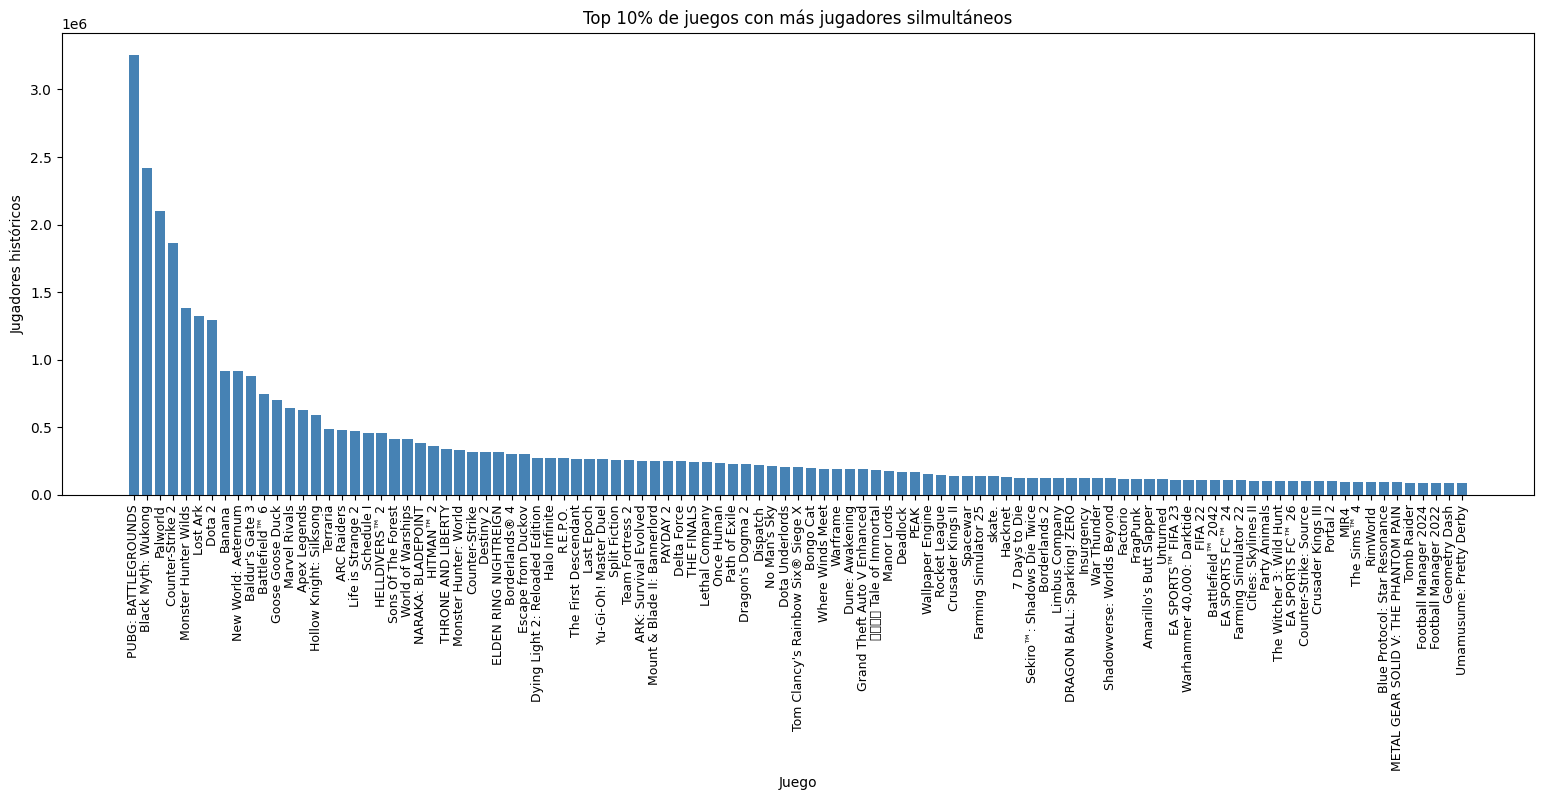

In [21]:
plt.figure(figsize=(19,6))
plt.bar(df_top10["name"], df_top10["Historico"], color="steelblue")

plt.xticks(rotation=90, fontsize=9)
plt.ylabel("Jugadores históricos")
plt.xlabel("Juego")
plt.title("Top 10% de juegos con más jugadores silmultáneos")
plt.show()

El precio tiene relacion con la cantidad de jugadores historicos de un juego? los juegos gratis por logica tienden a ser los mas jugados puesto que son gratis, pero es cierto?

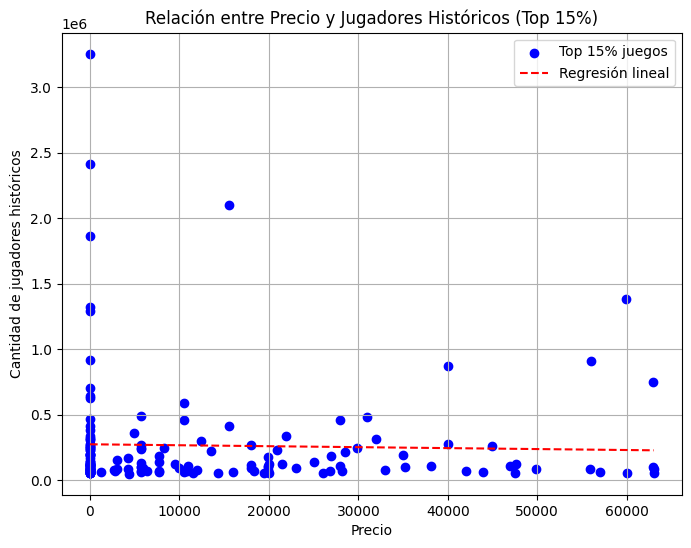

Inclinación (pendiente): [-0.72990953]
Intercepto: [273737.23420208]


In [ ]:
umbral = datos['Historico'].quantile(0.85) #tomamos el top 15% para no tener outliers de juegos con precios muy altos y pocos jugadores
top_juegos = datos[datos['Historico'] >= umbral]

X = top_juegos['price'].values.reshape(-1, 1)  # 2D para sklearn
y = top_juegos['Historico'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(top_juegos['price'].min(), top_juegos['price'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)


plt.figure(figsize=(8,6))
plt.scatter(top_juegos['price'], top_juegos['Historico'], color='blue', label='Top 15% juegos')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal')
plt.xlabel('Precio CLP$')
plt.ylabel('Cantidad de jugadores históricos')
plt.title('Relación entre Precio y Jugadores Históricos (Top 15%)')
plt.legend()
plt.grid(True)
plt.show()
pendiente = model.coef_[0]
intercepto = model.intercept_

print(f"Inclinación (pendiente): {pendiente}")
print(f"Intercepto: {intercepto}")

Vemos que aun asi hay outliers que afectan demasiado al grafico, asi que vamos a tratarlos de otra manera

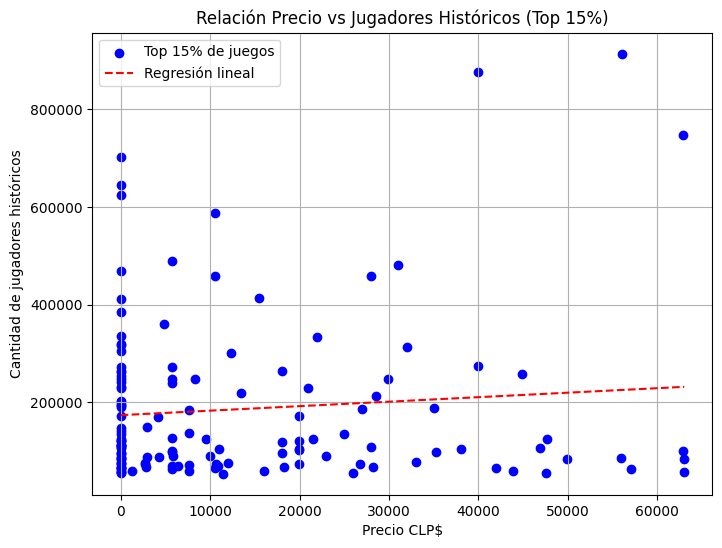

Pendiente de la regresión: [0.91963731]
Intercepto de la regresión: [174022.79890499]


In [40]:
umbral = datos['Historico'].quantile(0.85) #tomamos el top 15% 
top_juegos = datos[datos['Historico'] >= umbral]

Q1 = top_juegos['Historico'].quantile(0.05) #filtramos valores historicos bajos dentro del top 15%
Q3 = top_juegos['Historico'].quantile(0.95) #filtramos valores historicos altos dentro del top 15%
top_juegos_filtrado = top_juegos[(top_juegos['Historico'] >= Q1) & (top_juegos['Historico'] <= Q3)]

X = top_juegos_filtrado['price'].values.reshape(-1, 1)
y = top_juegos_filtrado['Historico'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(top_juegos_filtrado['price'].min(), top_juegos_filtrado['price'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure(figsize=(8,6))
plt.scatter(top_juegos_filtrado['price'], top_juegos_filtrado['Historico'],
            color='blue', label='Top 15% de juegos')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal')
plt.xlabel('Precio CLP$')
plt.ylabel('Cantidad de jugadores históricos')
plt.title('Relación Precio vs Jugadores Históricos (Top 15%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")
